## IMPORTING LIBRARIES

In [7]:
import sys 
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(root_dir)



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.features.build_features import inspect_dataframe
from src.features.build_features import preprocess_calendar, filter_train_data, process_sales_data



## READING THE DATA 

In [11]:
calender_events_df = pd.read_csv('../../data/raw/calendar_events.csv')
calender_df = pd.read_csv('../../data/raw/calendar.csv')
items_df = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv')
train_df = pd.read_csv('../../data/raw/sales_train.csv')

In [34]:
calender_events_df.head()

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


## DATA INSPECTION

In [12]:
inspect_dataframe(calender_events_df, "calender_events_df")
inspect_dataframe(calender_df, "calender_df")
inspect_dataframe(items_df, "items_df")
inspect_dataframe(train_df, "train_df")



Data Inspection for DataFrame: calender_events_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        167 non-null    object
 1   event_name  167 non-null    object
 2   event_type  167 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB

Head (first few rows):


,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious



Shape of df: (167, 3)

Summary Statistics:


,date,event_name,event_type
count,167,167,167
unique,162,30,4
top,2016-06-19,SuperBowl,Religious
freq,2,6,56



Missing Values Count:


date          0
event_name    0
event_type    0
dtype: int64


Unique Values Count:


date          162
event_name     30
event_type      4
dtype: int64




Data Inspection for DataFrame: calender_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1969 non-null   object
 1   wm_yr_wk  1969 non-null   int64 
 2   d         1969 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.3+ KB

Head (first few rows):


,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5



Shape of df: (1969, 3)

Summary Statistics:


,wm_yr_wk
count,1969.000000
mean,11347.086338
std,155.277043
min,11101.000000
25%,11219.000000
50%,11337.000000
75%,11502.000000
max,11621.000000



Missing Values Count:


date        0
wm_yr_wk    0
d           0
dtype: int64


Unique Values Count:


date        1969
wm_yr_wk     282
d           1969
dtype: int64




Data Inspection for DataFrame: items_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB

Head (first few rows):


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26



Shape of df: (6841121, 4)

Summary Statistics:


,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02



Missing Values Count:


store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


Unique Values Count:


store_id        10
item_id       3049
wm_yr_wk       282
sell_price    1048
dtype: int64




Data Inspection for DataFrame: train_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1547 entries, id to d_1541
dtypes: int64(1541), object(6)
memory usage: 359.9+ MB

Head (first few rows):


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3



Shape of df: (30490, 1547)

Summary Statistics:


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.129452,1.208691,1.484815,1.547393,1.131322,1.101902,1.137750,1.030863,1.084257,1.394424
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.219694,3.276399,3.964839,4.086634,3.035784,3.751499,3.219956,2.957792,3.159583,3.922461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,89.000000,128.000000,116.000000,131.000000,93.000000,299.000000,104.000000,129.000000,161.000000,192.000000



Missing Values Count:


id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1537      0
d_1538      0
d_1539      0
d_1540      0
d_1541      0
Length: 1547, dtype: int64


Unique Values Count:


id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1537         64
d_1538         59
d_1539         55
d_1540         61
d_1541         70
Length: 1547, dtype: int64

In [17]:
train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


# EDA

Calendar dataset contains columns like 'date', 'weekday', 'wday', 'month' and 'year' etc which basically indicates the overall duration across which this dataset was made.

It also contains columns like 'event_name_1', 'event_name_2' which represents whether there was any holiday or event like christmas, father's day, etc that can lead to an increase in the sales of the items.

From the sales_trainvalidation dataset given above we can observe that there are 30490 rows and 1547 columns, and if we observe the columns having 'd' in it's name, we can conclude that sales data for 1541 days have been provided to us.

In [5]:
train_df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

#### So we have three different categories namely:
    1. Hobbies
    2. Household 
    3. Foods

In [6]:
train_df['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

And within each categories, there are different departments. For example: for Hobbies category we have departments like Hobbies_1 and Hobbies_2. Similarly for Household and Foods categories.

In [7]:
train_df['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [8]:
train_df['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

The sales for three different states have been provided which are California, Texas and Wisconsin. Similar to the categories here also we have different stores for each state. For example in case of California we have CA_1, CA_2, and so on.

In [9]:
items_df['item_id'].nunique()

3049

We have 3049 unique items

In [10]:
train_df['store_id'].value_counts()

store_id
CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: count, dtype: int64

Our training data contains the sales of each 3049 items in each store which means train_df represents the sale of each item in 10 different stores(30490 * 10) for 1541 days

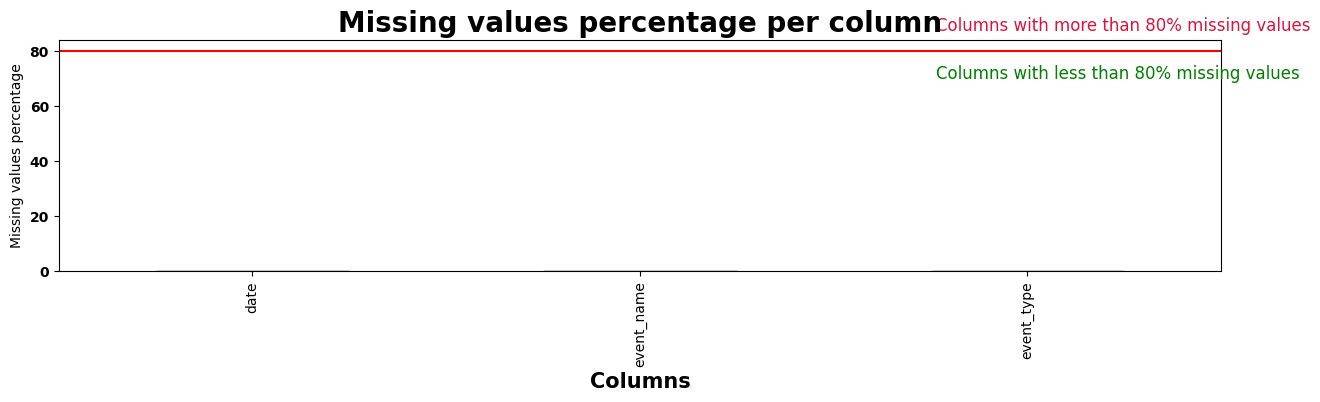

In [16]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(calender_events_df, 80, color=sns.color_palette('Reds',15))

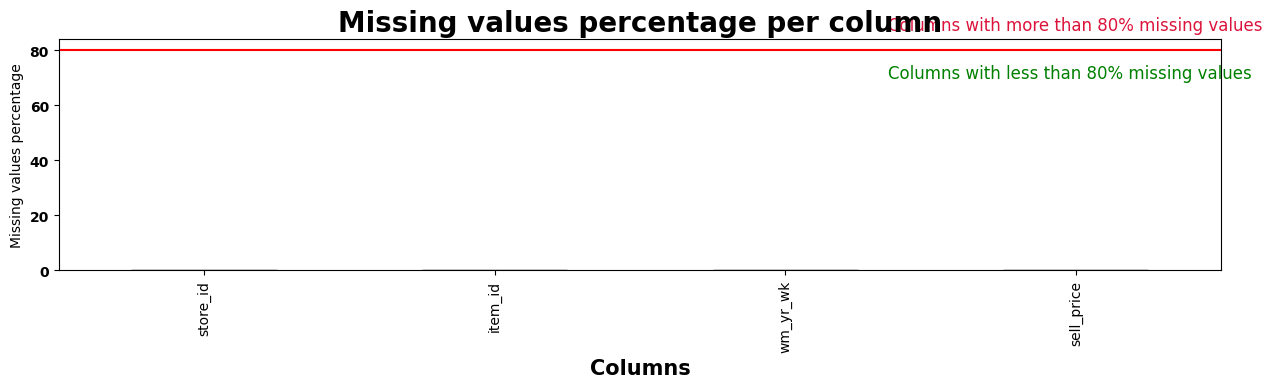

In [23]:
msv_1(items_df, 80, color=sns.color_palette('Reds',15))

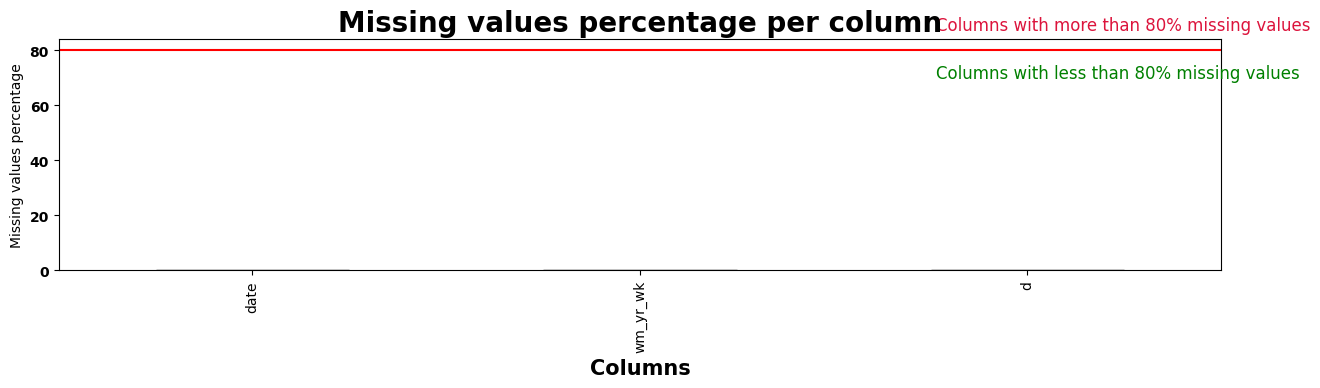

In [24]:
msv_1(calender_df, 80, color=sns.color_palette('Reds',15))

### Analysing  the sales of random items 

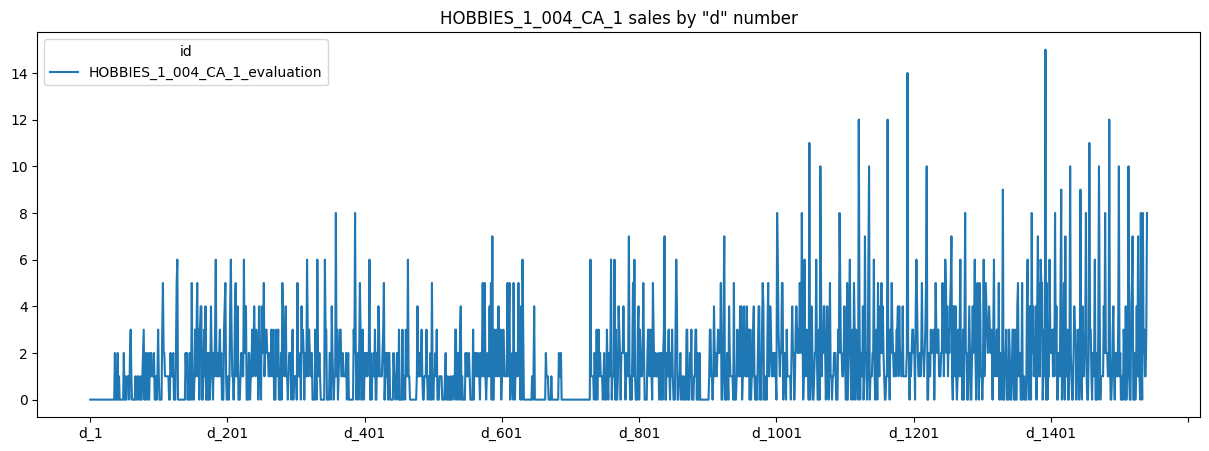

In [13]:
from itertools import cycle
import matplotlib.pyplot as plt

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

dcols = [c for c in train_df.columns if 'd_' in c] ## Represents the days(d_1 -> d_1913)

train_df.loc[train_df['id'] == 'HOBBIES_1_004_CA_1_evaluation'].set_index('id')[dcols].T.plot(
figsize = (15, 5), title='HOBBIES_1_004_CA_1 sales by "d" number', color = next(color_cycle))
plt.show()

### We'll be utilising these visualisation in our forecasting model as it might be useful for that scenari 
Let's now examine the sales of the above 3 items and weekly, monthly and yearly level.

In [18]:
example = train_df.loc[train_df['id'] == 'FOODS_3_090_CA_3_evaluation'][dcols].T # Col name will be 8412
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Rename the column to FOODS_3_090_CA_3
example = example.reset_index().rename(columns={'index': 'd'}) # make the index d_1, d_2...d_1913
example = example.merge(calender_df, how='left', validate='1:1')
example.head(5)

,d,FOODS_3_090_CA_3,date,wm_yr_wk
0,d_1,108,2011-01-29,11101
1,d_2,132,2011-01-30,11101
2,d_3,102,2011-01-31,11101
3,d_4,120,2011-02-01,11101
4,d_5,106,2011-02-02,11101


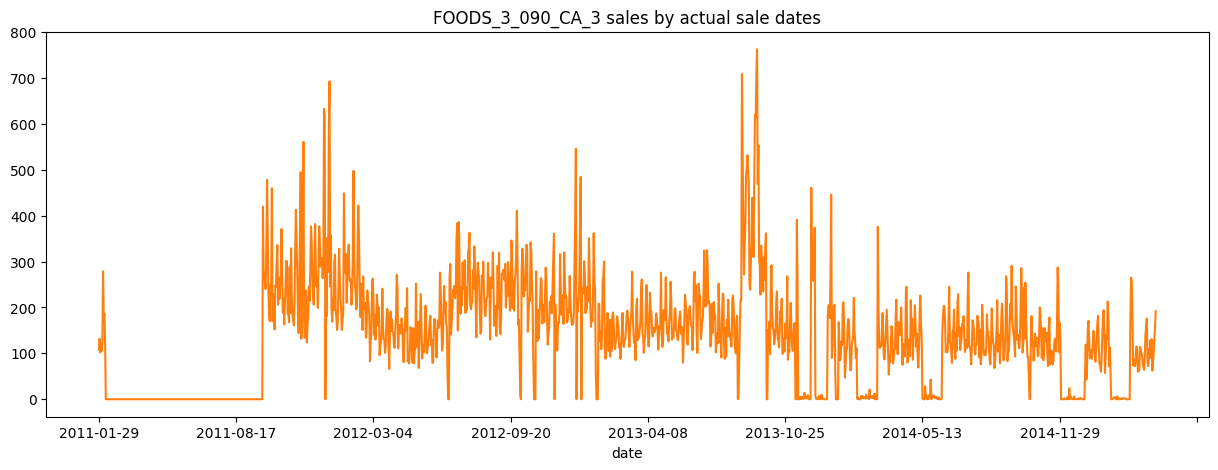

In [19]:
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

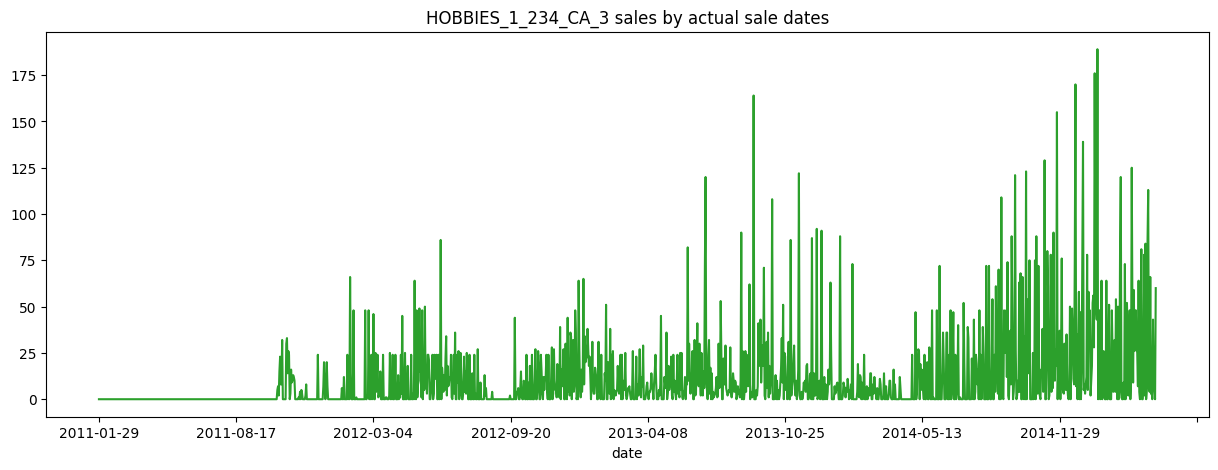

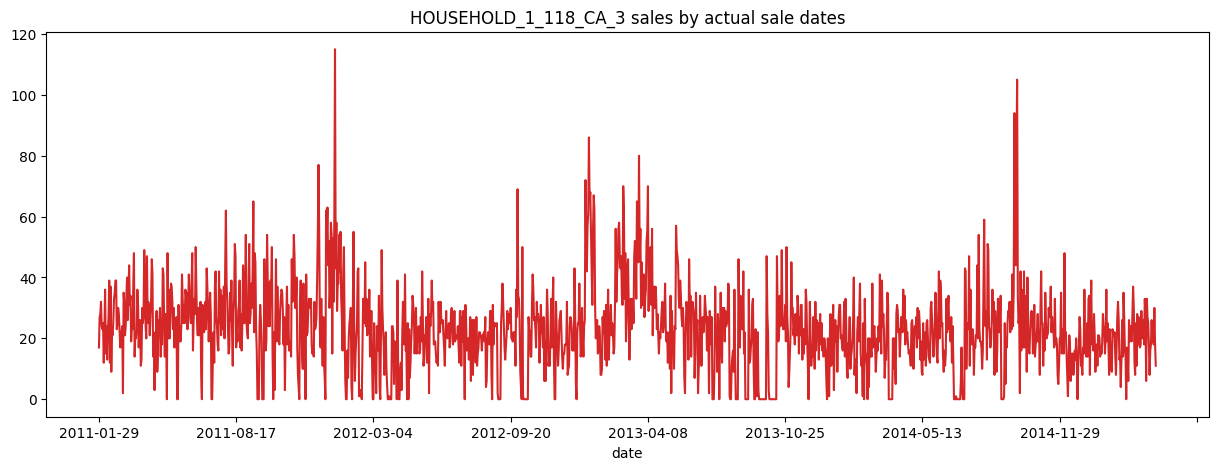

In [21]:
example2 = train_df.loc[train_df['id'] == 'HOBBIES_1_234_CA_3_evaluation'][dcols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'}) 
example2 = example2.merge(calender_df, how='left', validate='1:1')

example2.set_index('date')['HOBBIES_1_234_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOBBIES_1_234_CA_3 sales by actual sale dates')
plt.show()

example3 = train_df.loc[train_df['id'] == 'HOUSEHOLD_1_118_CA_3_evaluation'][dcols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(calender_df, how='left', validate='1:1')

example3.set_index('date')['HOUSEHOLD_1_118_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOUSEHOLD_1_118_CA_3 sales by actual sale dates')
plt.show()

## Plotting sales of any random 10 itsm 


In [11]:
ten_items = train_df.sample(20, random_state = 529).set_index('id')[dcols].T.merge(
calender_df.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1').set_index('date')

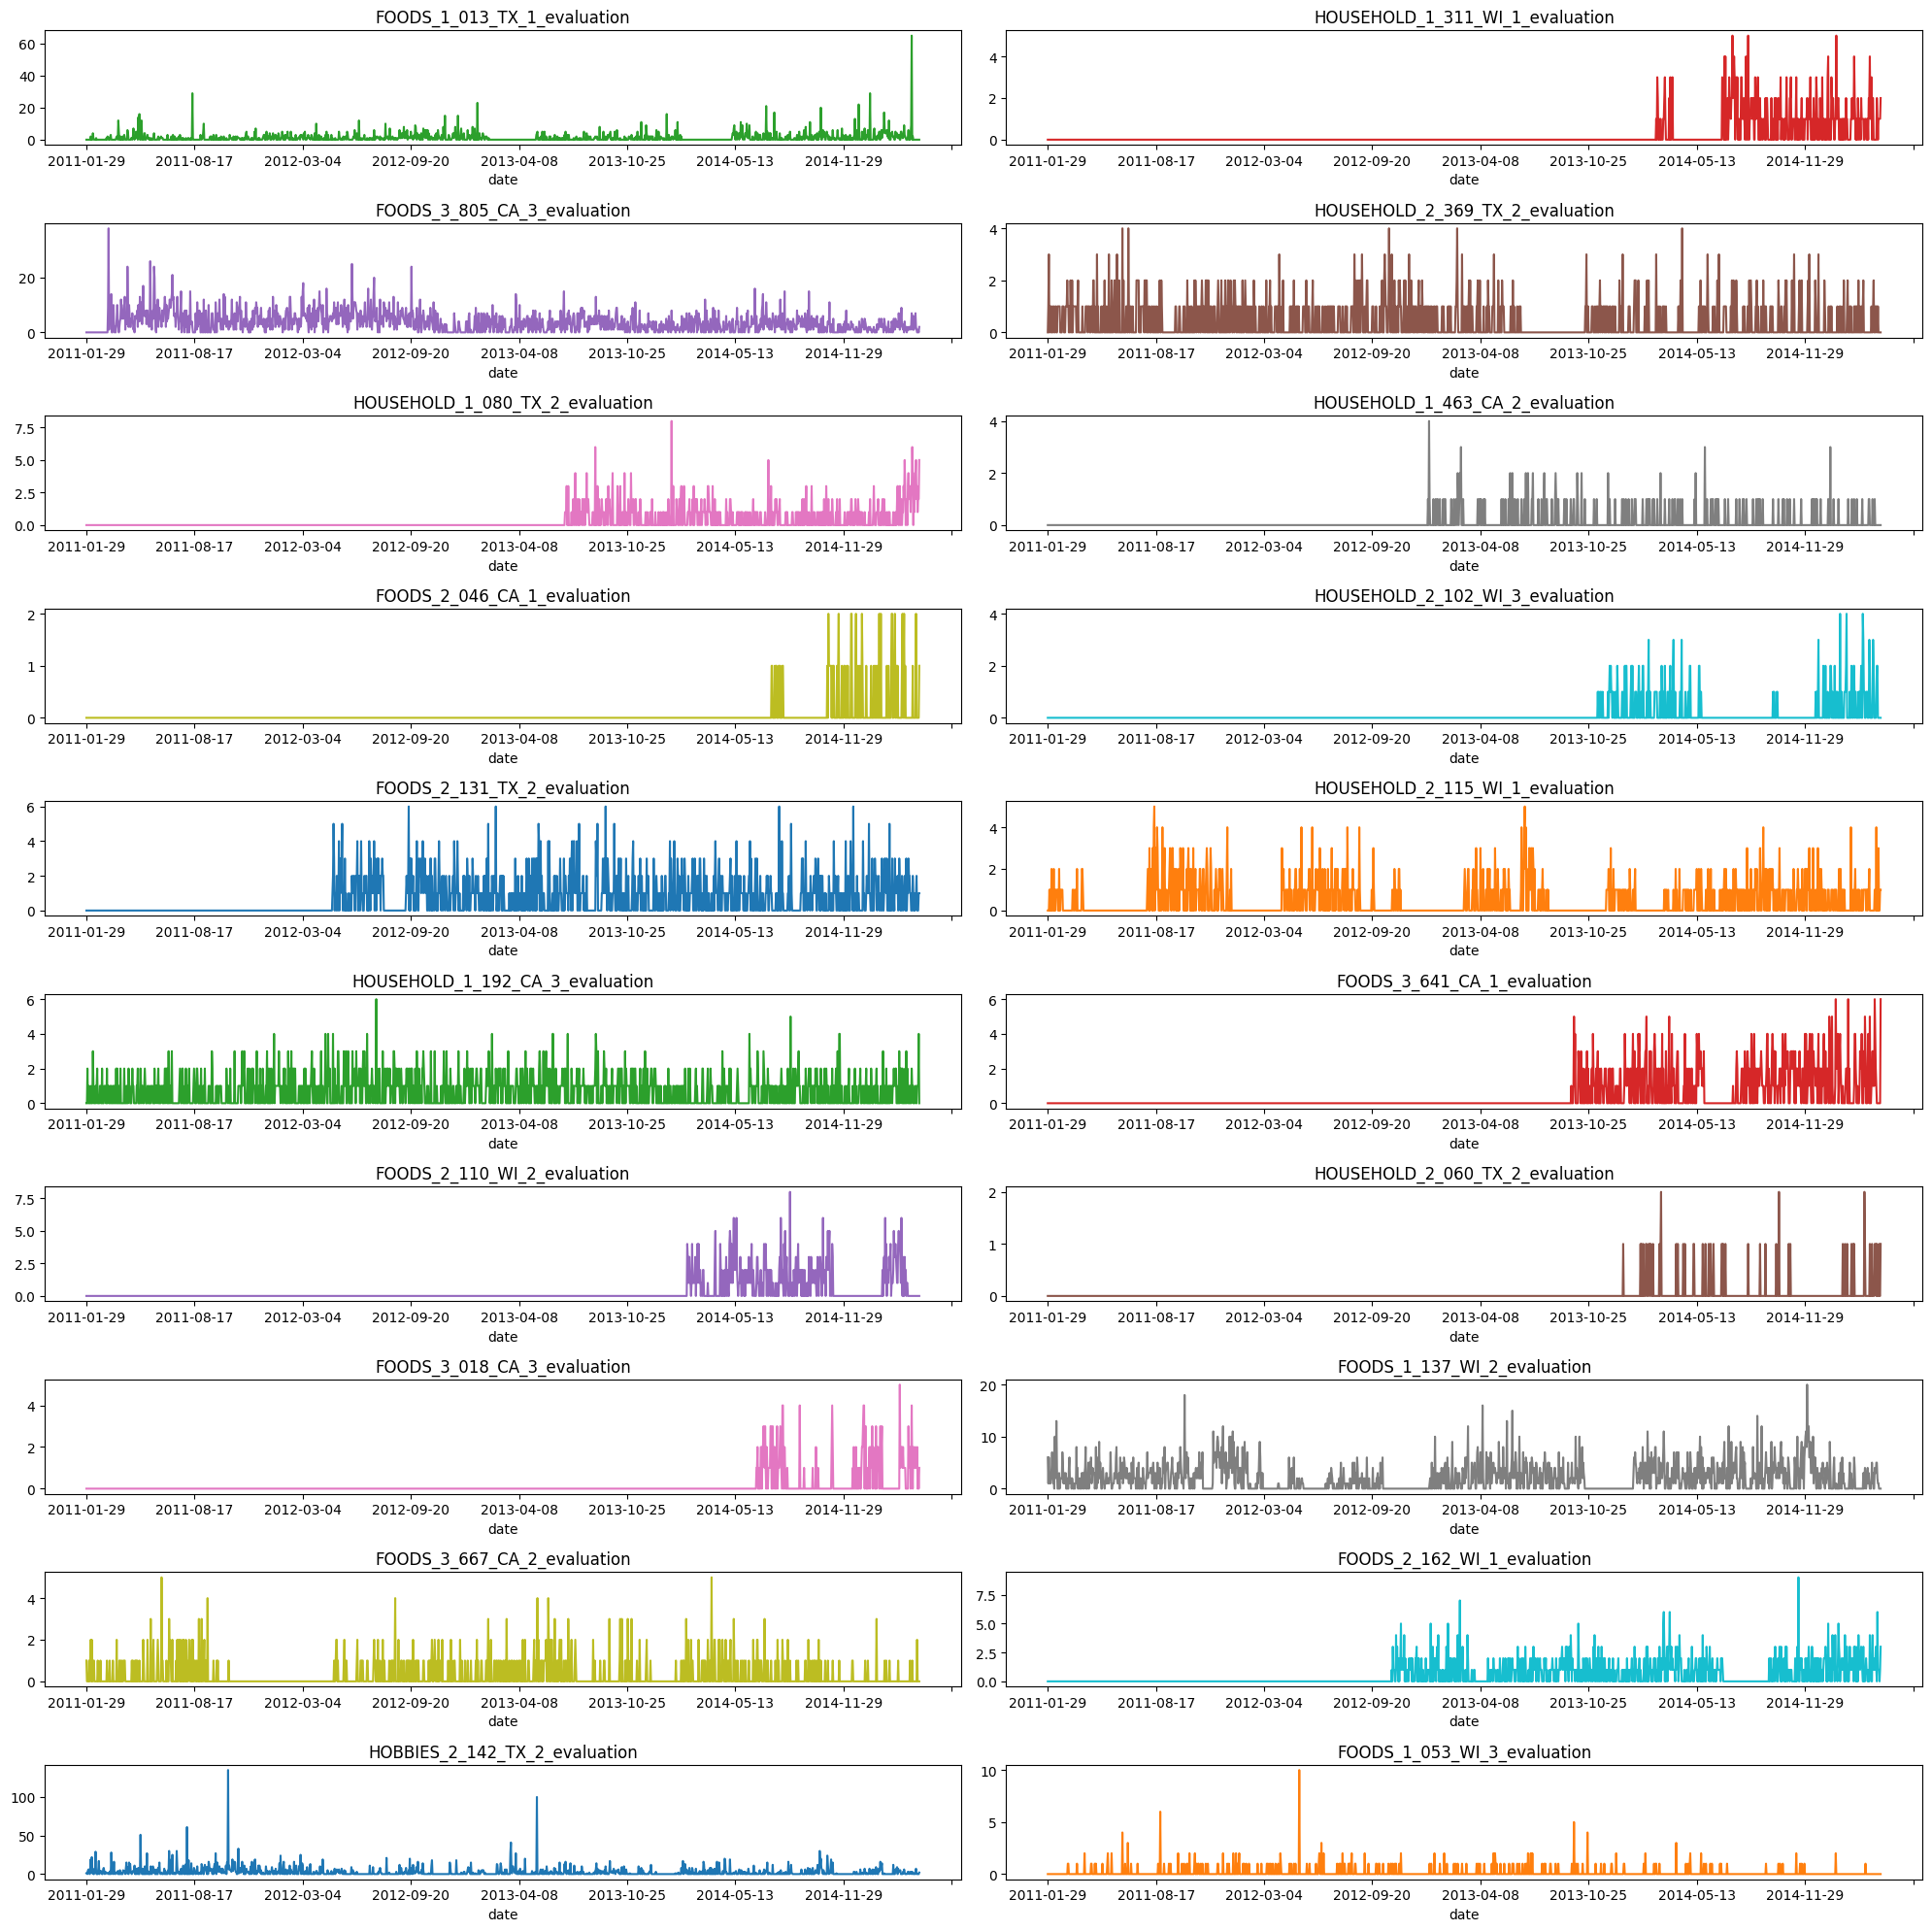

In [12]:
fig, axs = plt.subplots(10, 2, figsize = (20, 20))
axs = axs.flatten()

ax_idx = 0

for item in ten_items.columns:
    ten_items[item].plot(
    title = item, color = next(color_cycle),
    ax = axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

## sales based on categories

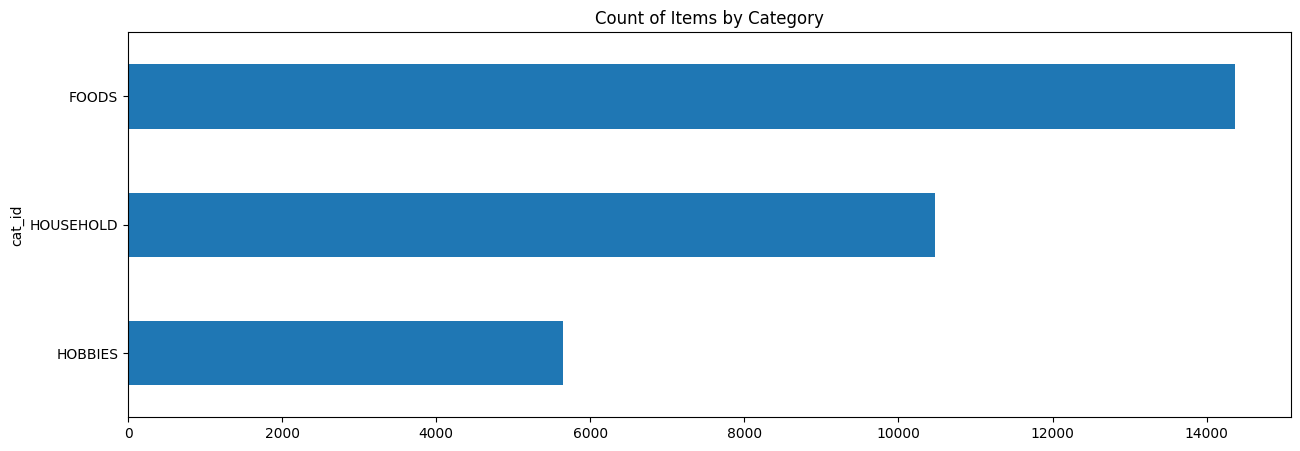

In [25]:
train_df.groupby('cat_id').count()['id'].sort_values().plot(kind = 'barh', figsize=(15, 5), title='Count of Items by Category')
plt.savefig('categories_sales.png')
plt.show()


### We can see that the sales of the FOOD items is the highest among all the categories

In [28]:
past_sales = train_df.set_index('id')[dcols].T.merge(calender_df.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1').set_index('date')


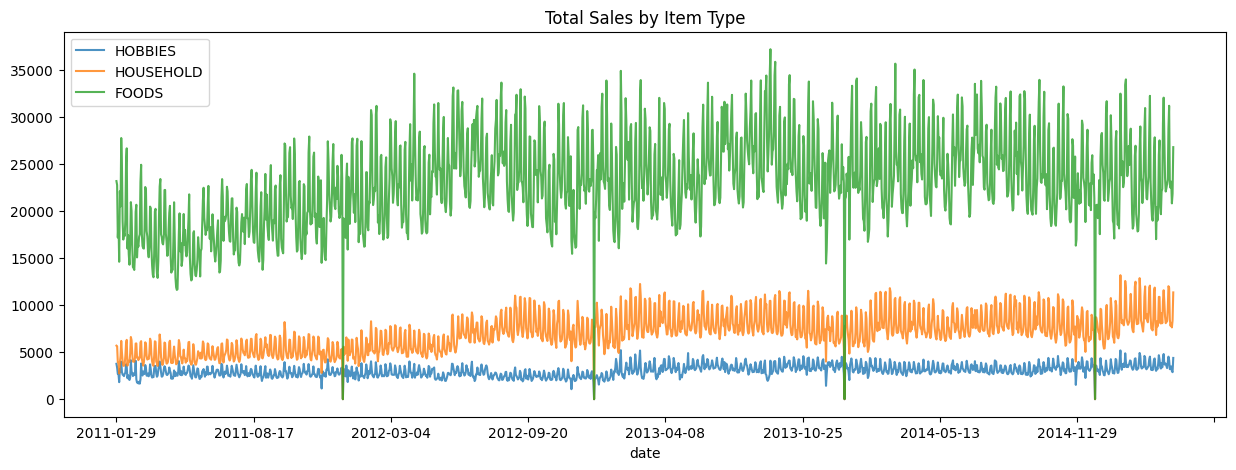

In [29]:
for i in train_df['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col].sum(axis = 1).plot(figsize = (15, 5), alpha = 0.8, title = 'Total Sales by Item Type')
plt.legend(train_df['cat_id'].unique())
plt.savefig('forecast_categories.png')
plt.show()


In [31]:
train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [32]:
# Convert the date column to a pandas datetime object
example['date'] = pd.to_datetime(example['date'])

# Extract the wday, month, and year from the date column
example['wday'] = example['date'].dt.dayofweek + 1  # Monday=1, Sunday=7
example['month'] = example['date'].dt.month
example['year'] = example['date'].dt.year

example.head(5)


,d,FOODS_3_090_CA_3,date,wm_yr_wk,wday,month,year
0,d_1,108,2011-01-29,11101,6,1,2011
1,d_2,132,2011-01-30,11101,7,1,2011
2,d_3,102,2011-01-31,11101,1,1,2011
3,d_4,120,2011-02-01,11101,2,2,2011
4,d_5,106,2011-02-02,11101,3,2,2011


### AS from the above visual we can see that the sales of food is much more than the other two categories

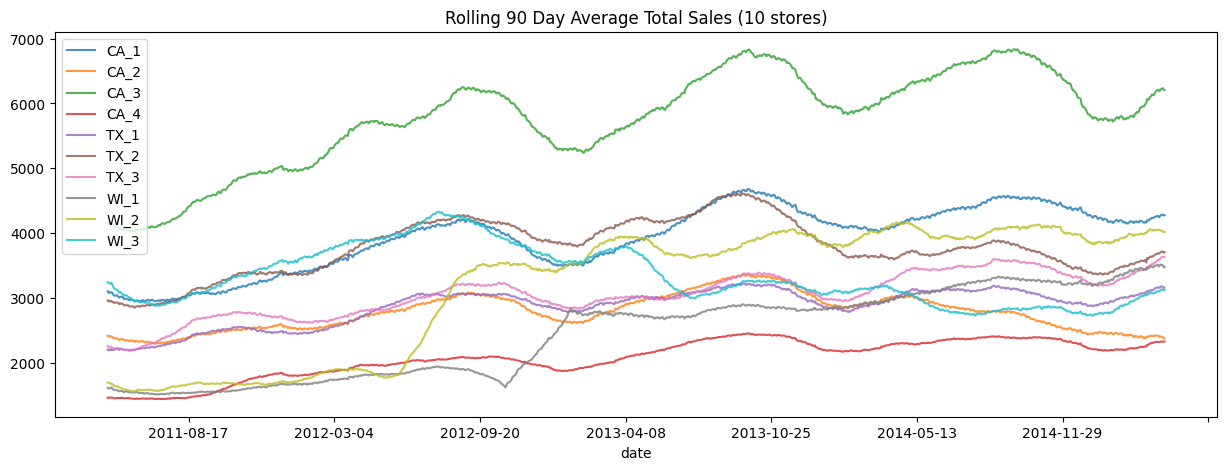

In [35]:
store_list = items_df['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.savefig('average 90 day sales', dpi=300)
plt.show()
## Average sales of itmes in each store on 90 days average.

## Merging the data for further analysis
#### Since the goal here is to choose one specific state, specific store and a specific item we'll keep the goal in mind while performing the next few steps.

In [3]:

final_calendar = preprocess_calendar(calender_df, calender_events_df)
filtered_train = filter_train_data(train_df)  # You can pass other values as well
final_sales_data = process_sales_data(filtered_train, final_calendar, items_df)
print(final_sales_data)


           date  Sales Day         event_name event_type   
0    2011-01-29          1  no specific event       none  \
1    2011-01-30          2  no specific event       none   
2    2011-01-31          3  no specific event       none   
3    2011-02-01          4  no specific event       none   
4    2011-02-02          5  no specific event       none   
...         ...        ...                ...        ...   
1536 2015-04-14       1537  no specific event       none   
1537 2015-04-15       1538  no specific event       none   
1538 2015-04-16       1539  no specific event       none   
1539 2015-04-17       1540  no specific event       none   
1540 2015-04-18       1541  no specific event       none   

      Daily volume of sales  Daily selling price  Sales Revenue  
0                         3                 0.60           1.80  
1                         0                 0.00           0.00  
2                         0                 0.00           0.00  
3              

In [4]:
final_sales_data.head(10)

,date,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue
0,2011-01-29,1,no specific event,none,3,0.600000,1.800000
1,2011-01-30,2,no specific event,none,0,0.000000,0.000000
2,2011-01-31,3,no specific event,none,0,0.000000,0.000000
3,2011-02-01,4,no specific event,none,1,0.200000,0.200000
4,2011-02-02,5,no specific event,none,4,0.800000,3.200000
5,2011-02-03,6,no specific event,none,2,0.400000,0.800000
6,2011-02-04,7,no specific event,none,0,0.000000,0.000000
7,2011-02-05,8,no specific event,none,2,0.666667,1.333333
8,2011-02-06,9,SuperBowl,Sporting,0,0.000000,0.000000
9,2011-02-07,10,no specific event,none,0,0.000000,0.000000


<Figure size 1400x700 with 0 Axes>

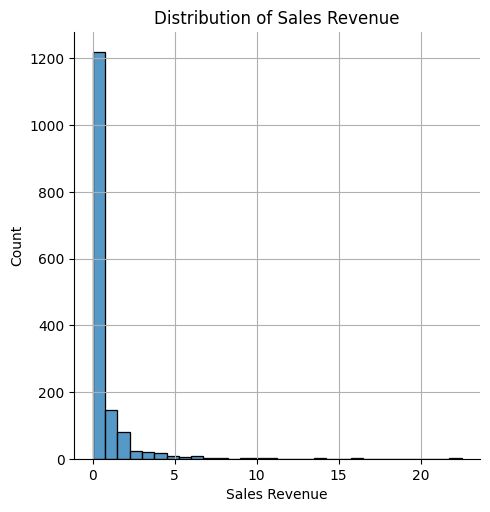

In [5]:
# 1. Distribution of the Target Variable - 'Sales Revenue'
plt.figure(figsize=(14,7))
sns.displot(final_sales_data['Sales Revenue'], bins=30)
plt.title('Distribution of Sales Revenue')
plt.grid(True)
plt.show()

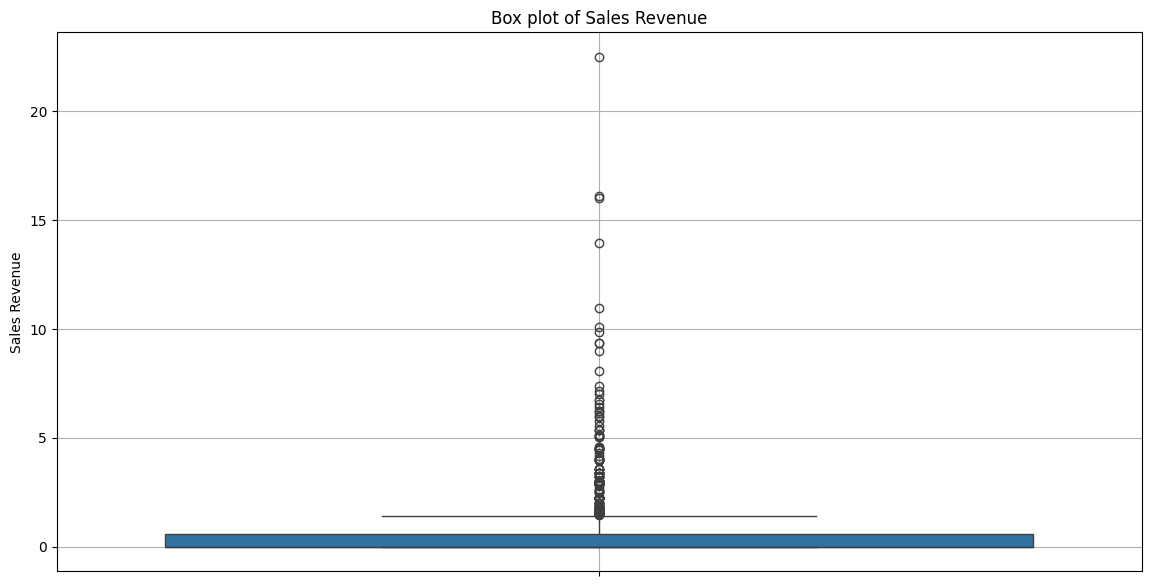

In [6]:
# Outliers
# Box plot for Sales Revenue to detect outliers
plt.figure(figsize=(14,7))
sns.boxplot(final_sales_data['Sales Revenue'])
plt.title('Box plot of Sales Revenue')
plt.grid(True)
plt.show()

In [11]:
final_sales_data.columns

Index(['Sales Day', 'event_name', 'event_type', 'Daily volume of sales',
       'Daily selling price', 'Sales Revenue'],
      dtype='object')

In [6]:
final_sales_data['Day of Week'] = final_sales_data['date'].dt.dayofweek
final_sales_data['Month'] = final_sales_data['date'].dt.month
final_sales_data['Year'] = final_sales_data['date'].dt.year


In [7]:
final_sales_data.head()

,date,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year
0,2011-01-29,1,no specific event,none,3,0.6,1.8,5,1,2011
1,2011-01-30,2,no specific event,none,0,0.0,0.0,6,1,2011
2,2011-01-31,3,no specific event,none,0,0.0,0.0,0,1,2011
3,2011-02-01,4,no specific event,none,1,0.2,0.2,1,2,2011
4,2011-02-02,5,no specific event,none,4,0.8,3.2,2,2,2011


In [8]:
final_sales_data.drop('date', axis=1, inplace=True)


In [9]:
final_sales_data.head()

,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year
0,1,no specific event,none,3,0.6,1.8,5,1,2011
1,2,no specific event,none,0,0.0,0.0,6,1,2011
2,3,no specific event,none,0,0.0,0.0,0,1,2011
3,4,no specific event,none,1,0.2,0.2,1,2,2011
4,5,no specific event,none,4,0.8,3.2,2,2,2011


In [15]:
final_sales_data['event_name'].unique()

array(['no specific event', 'SuperBowl', 'ValentinesDay', 'PresidentsDay',
       'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'Easter & OrthodoxEaster', 'Pesach End', 'Cinco De Mayo',
       "Mother's day", 'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd',
       "Father's day", 'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr',
       'LaborDay', 'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter',
       'OrthodoxEaster', 'Cinco De Mayo & OrthodoxEaster',
       "Father's day & NBAFinalsEnd"], dtype=object)

In [13]:
final_sales_data['event_type'].unique()

array(['none', 'Sporting', 'Cultural', 'National', 'Religious',
       'Cultural & Religious', 'Cultural & Sporting'], dtype=object)

### getting data ready for forecasting

In [3]:
import pandas as pd

# Load the datasets
Calendar = pd.read_csv('data/raw/calendar.csv')
sell_prices = pd.read_csv('data/raw/items_weekly_sell_prices.csv')
train = pd.read_csv('data/raw/sales_train.csv')

# Drop unnecessary columns
train = train.melt(id_vars=['store_id', 'item_id'], 
                   var_name='Sales Day', 
                   value_name='Sales')

# Merge datasets
merged_data = (train.merge(Calendar.rename(columns={'d': 'Sales Day'}), on='Sales Day', how='inner')
               .drop(columns=['Sales Day'])
               .merge(sell_prices, on=['store_id', 'wm_yr_wk', 'item_id'], how='inner'))

# Calculate daily revenue for each item
merged_data['item_daily_revenue'] = merged_data['Sales'] * merged_data['sell_price']

# Sum the revenues across all items for that day to get the total daily sales revenue for each store
Sales = merged_data.groupby(['date', 'store_id'])['item_daily_revenue'].sum().reset_index().pivot(index='date', columns='store_id', values='item_daily_revenue')

# Now, get the total sales revenue across all stores
Sales['Total_sales_revenue'] = Sales.sum(axis=1)

# For forecasting, focus only on total sales revenue
Sales = Sales[['Total_sales_revenue']]

# Splitting data into training and testing sets
total_rows = Sales.shape[0]
num_testing_rows = 7  # We want to forecast for the next 7 days
split_index = total_rows - num_testing_rows

Sales_training = Sales.iloc[:split_index]
Sales_testing = Sales.iloc[split_index:]

print(Sales_training)
print(Sales_testing)


store_id   Total_sales_revenue
date                          
2011-01-29            81650.61
2011-01-30            78970.57
2011-01-31            57706.91
2011-02-01             60761.2
2011-02-02            46959.95
...                        ...
2015-04-07           106346.04
2015-04-08           107403.58
2015-04-09           107586.05
2015-04-10           114582.66
2015-04-11           140711.93

[1534 rows x 1 columns]
store_id   Total_sales_revenue
date                          
2015-04-12           150877.68
2015-04-13           108344.86
2015-04-14           102896.92
2015-04-15           106913.88
2015-04-16            98373.49
2015-04-17           103030.58
2015-04-18           132625.89


In [50]:
Sales_training.tail()

store_id,Total_sales_revenue
date,
2015-04-07,106346.04
2015-04-08,107403.58
2015-04-09,107586.05
2015-04-10,114582.66
2015-04-11,140711.93


In [10]:
print(Sales_training['Total_sales_revenue'].dtype)
print(Sales_testing['Total_sales_revenue'].dtype)


object
object


#### ARIMA

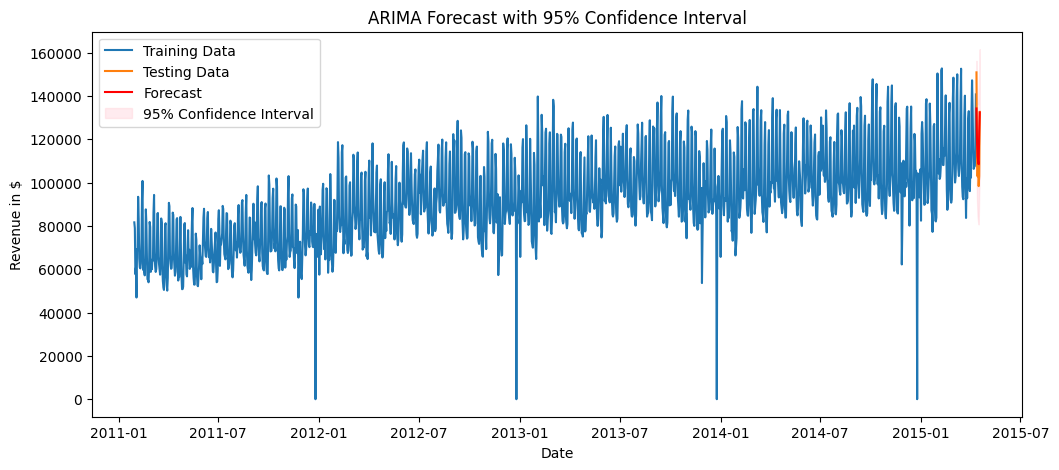

Mean Absolute Error (MAE): 9963.121134196428
Mean Squared Error (MSE): 142146038.40577906
Root Mean Squared Error (RMSE): 11922.50134853333


In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Explicitly create copies to avoid SettingWithCopyWarning
Sales_training = Sales.iloc[:split_index].copy()
Sales_testing = Sales.iloc[split_index:].copy()

# Ensure date is a datetime object
Sales_training.index = pd.to_datetime(Sales_training.index)
Sales_testing.index = pd.to_datetime(Sales_testing.index)

# Convert the 'Total_sales_revenue' columns to numeric data type
Sales_training['Total_sales_revenue'] = pd.to_numeric(Sales_training['Total_sales_revenue'], errors='coerce').astype(float)
Sales_testing['Total_sales_revenue'] = pd.to_numeric(Sales_testing['Total_sales_revenue'], errors='coerce').astype(float)

# Set frequency of DataFrame index for ARIMA
Sales_training.index = pd.DatetimeIndex(Sales_training.index).to_period('D')

# Train the ARIMA model
model = ARIMA(Sales_training['Total_sales_revenue'], order=(5,1,0))
fitted_model = model.fit()

# Forecasting for the next 7 days
forecast = fitted_model.get_forecast(steps=7)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Convert back to datetime index for plotting
mean_forecast.index = mean_forecast.index.to_timestamp()

# Plotting the forecast along with the confidence interval
plt.figure(figsize=(12, 5))
plt.plot(Sales_training.index.to_timestamp(), Sales_training['Total_sales_revenue'], label="Training Data")
plt.plot(Sales_testing.index, Sales_testing['Total_sales_revenue'], label="Testing Data")
plt.plot(mean_forecast.index, mean_forecast.values, color='red', label="Forecast")
plt.fill_between(mean_forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label="95% Confidence Interval")
plt.title("ARIMA Forecast with 95% Confidence Interval")
plt.xlabel('Date')
plt.ylabel('Revenue in $')
plt.legend()
plt.show()

# Calculate metrics
y_true = Sales_testing['Total_sales_revenue']
y_pred = mean_forecast.values

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


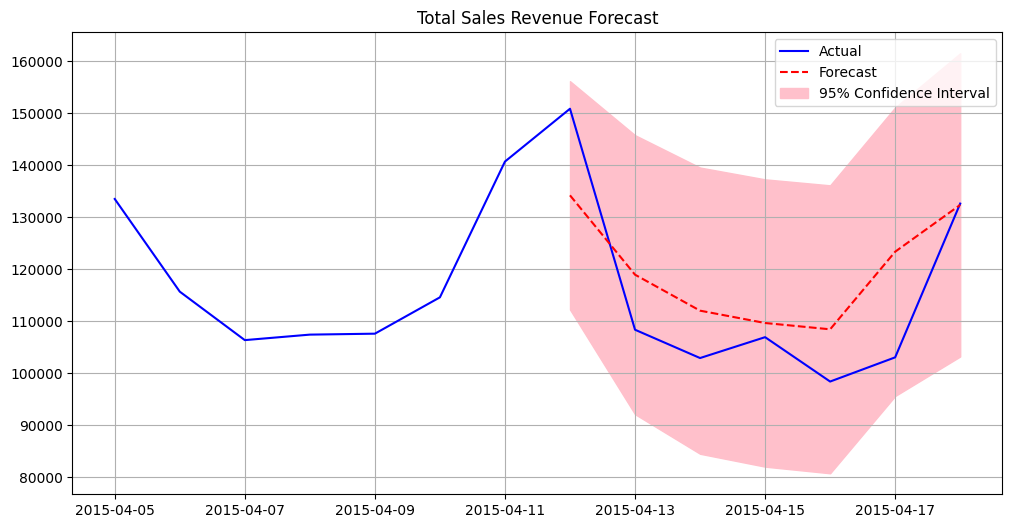

In [40]:
# Visualizing the forecast
plt.figure(figsize=(12, 6))
plt.plot(Sales.index[-(num_testing_rows*2):], Sales['Total_sales_revenue'].iloc[-(num_testing_rows*2):], color='blue', label='Actual')
plt.plot(Sales_testing.index, mean_forecast.values, color='red', linestyle='--', label='Forecast')
plt.fill_between(Sales_testing.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', label='95% Confidence Interval')
plt.title('Total Sales Revenue Forecast')
plt.legend()
plt.grid(True)
plt.show()


## SARIMAX MODEL

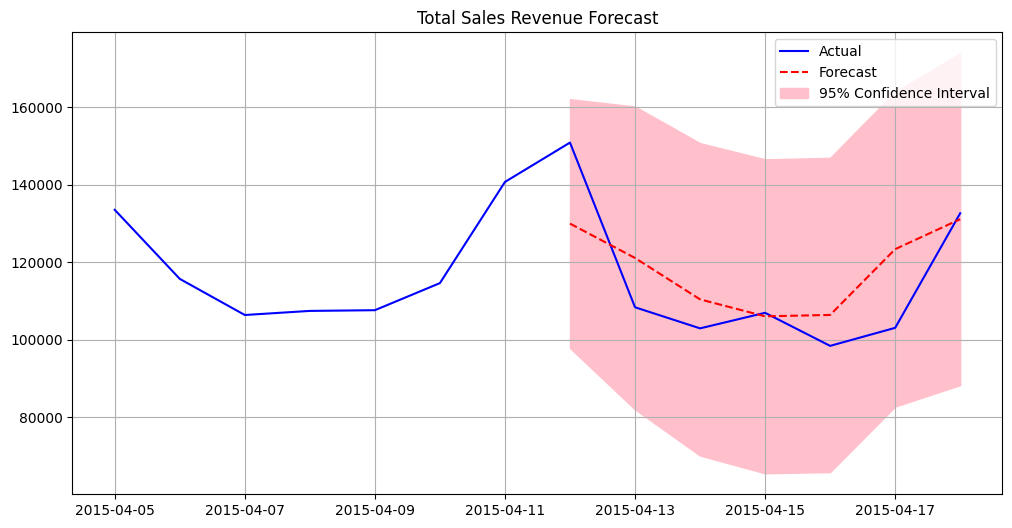

RMSE: 12739.34171811896


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Convert the 'Total_sales_revenue' column to float type
Sales['Total_sales_revenue'] = Sales['Total_sales_revenue'].astype(float)

# Ensure the DataFrame index is of datetime type
Sales.index = pd.to_datetime(Sales.index)

# Fit SARIMA model to the training data
# Using (5,1,0)x(1,1,1,12) as an example order
# Note: (1,1,1,12) represents seasonal order: SAR, SD, SMA, and S - seasonal length (assuming monthly seasonality)
model = SARIMAX(Sales_training, order=(5,1,0), seasonal_order=(1,1,1,12))
fit_model = model.fit()

# Forecast sales for the testing period
forecast_result = fit_model.get_forecast(steps=num_testing_rows)
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

# Visualizing the forecast
plt.figure(figsize=(12, 6))
plt.plot(Sales.index[-(num_testing_rows*2):], Sales['Total_sales_revenue'].iloc[-(num_testing_rows*2):], color='blue', label='Actual')
plt.plot(Sales_testing.index, forecast, color='red', linestyle='--', label='Forecast')
plt.fill_between(Sales_testing.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', label='95% Confidence Interval')
plt.title('Total Sales Revenue Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the RMSE
mse = mean_squared_error(Sales_testing, forecast)
rmse = mse**0.5
print(f"RMSE: {rmse}")


# HOLT-WINTERS MODEL


C:\Users\nutan\AppData\Local\pypoetry\Cache\virtualenvs\ml-yCBGo_aC-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


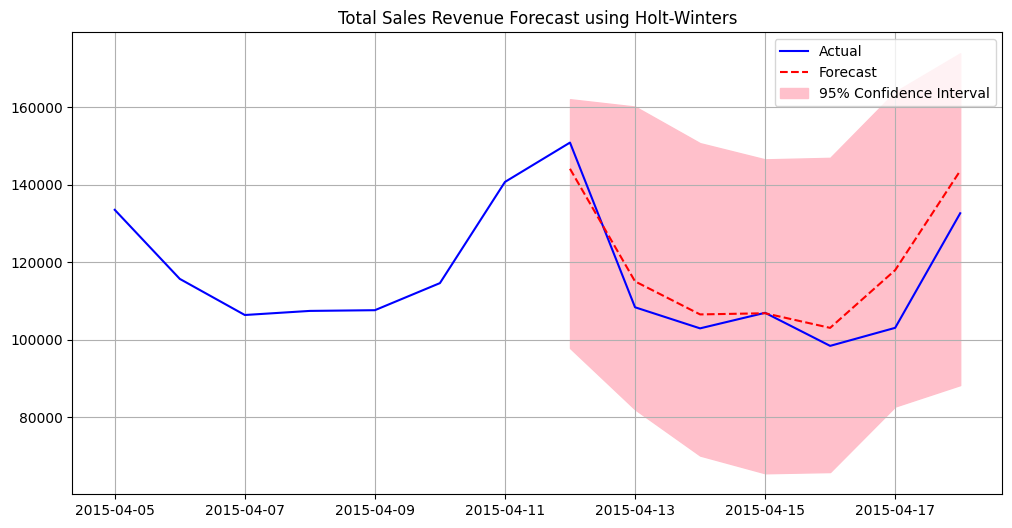

RMSE: 8173.580852668882


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Convert the 'Total_sales_revenue' column to float type (if it's not already)
Sales['Total_sales_revenue'] = Sales['Total_sales_revenue'].astype(float)

# Ensure the DataFrame index is of datetime type
Sales.index = pd.to_datetime(Sales.index)

# Fit Holt-Winters model to the training data
model = ExponentialSmoothing(Sales_training, trend='add', seasonal='add', seasonal_periods=7)  # Assuming weekly seasonality
fit_model = model.fit()

# Forecast sales for the testing period
forecast = fit_model.forecast(steps=num_testing_rows)

# Visualizing the forecast
plt.figure(figsize=(12, 6))
plt.plot(Sales.index[-(num_testing_rows*2):], Sales['Total_sales_revenue'].iloc[-(num_testing_rows*2):], color='blue', label='Actual')
plt.plot(Sales_testing.index, forecast, color='red', linestyle='--', label='Forecast')
plt.fill_between(Sales_testing.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', label='95% Confidence Interval')
plt.title('Total Sales Revenue Forecast using Holt-Winters')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the RMSE
mse = mean_squared_error(Sales_testing, forecast)
rmse = mse**0.5
print(f"RMSE: {rmse}")


### Saving the best model as an artifact 

In [34]:
from joblib import dump

# Save the trained model to a file
dump(fit_model, "models/forecastive/holt_winters_model.joblib")


['models/holt_winters_model.joblib']

## Load the model 

In [43]:
from joblib import load

# Load the trained model from a file
loaded_model = load("models/forecastive/holt_winters_model.joblib")


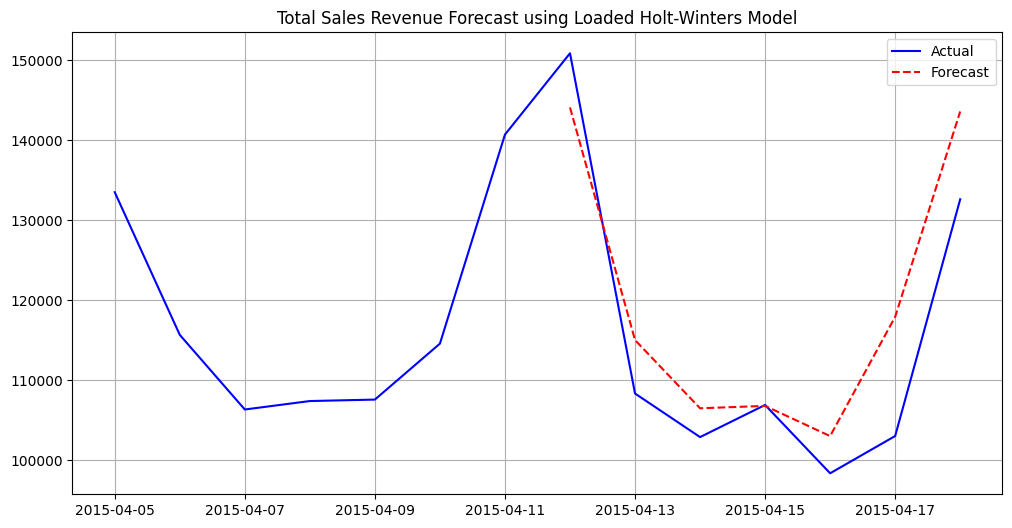

In [44]:

# Forecast sales for the testing period using the loaded model
loaded_forecast = loaded_model.forecast(steps=num_testing_rows)

# Visualizing the forecast
plt.figure(figsize=(12, 6))
plt.plot(Sales.index[-(num_testing_rows*2):], Sales['Total_sales_revenue'].iloc[-(num_testing_rows*2):], color='blue', label='Actual')
plt.plot(Sales_testing.index, loaded_forecast, color='red', linestyle='--', label='Forecast')

# Note: Since you're using the Holt-Winters method in this example and not ARIMA, you won't have the confidence interval data (conf_int) as before. 
# If you want to include confidence intervals, you'll need a different approach or use a model that provides it (e.g., ARIMA, SARIMAX).

plt.title('Total Sales Revenue Forecast using Loaded Holt-Winters Model')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
Sales.head(10)

store_id,Total_sales_revenue
date,
2011-01-29,81650.61
2011-01-30,78970.57
2011-01-31,57706.91
2011-02-01,60761.20
2011-02-02,46959.95
2011-02-03,69377.38
2011-02-04,68789.06
2011-02-05,93447.75
2011-02-06,83497.56
